In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_scalebar
from PIL import Image
from glob import glob
from natsort import natsorted
from matplotlib.colors import LogNorm
from matplotlib.colors import PowerNorm
from skimage.filters import gaussian

from SyMBac.PSF import PSF_generator
from SyMBac.renderer import convolve_rescale
from skimage.util import random_noise
from scipy.ndimage import gaussian_filter

from skimage.exposure import rescale_intensity
from skimage import color, data, restoration
import sys
sys.path.insert(0, "../") 

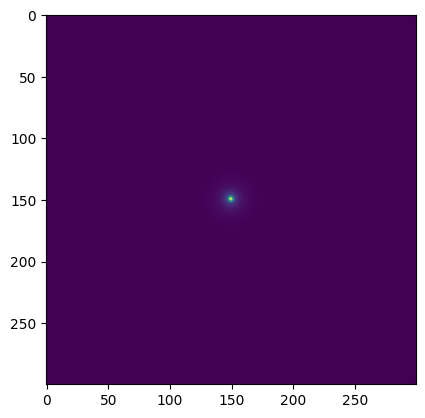

In [4]:
unconvolved_dir = natsorted(glob("data/scenes/*.png"))
convolved_dir = natsorted(glob("training_data/training_data_100x_0.65_far red_1.45_1.518/synth_imgs/*"))
my_kernel = PSF_generator(
    radius = 150, 
    wavelength = 0.64, 
    NA=1.45, 
    n = 1.518, 
    resize_amount=1, 
    pix_mic_conv=0.065, 
    apo_sigma = 10, 
    mode="3d fluo", 
    condenser="Ph3", 
    z_height = 50,
    working_distance=170
)
my_kernel.calculate_PSF()
psf = my_kernel.kernel.mean(axis=0)
plt.imshow(psf)

In [5]:
masks = natsorted(glob("data/masks//*.png"))


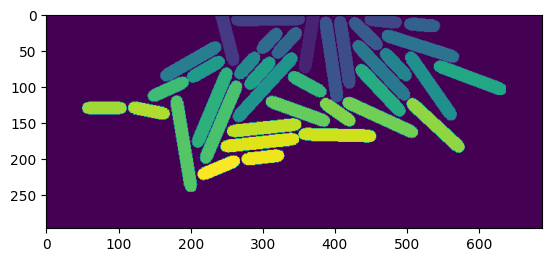

In [6]:
master_mask = np.array(Image.open(masks[27 + 19*28]))[150:,:700]
plt.imshow(master_mask)

In [7]:
low_CV_conv = np.array(Image.open(convolved_dir[27 + 19*28]))[150:,:700]
high_CV_conv = np.array(Image.open(convolved_dir[-1]))[150:,:700]

low_CV_unconv = np.array(Image.open(unconvolved_dir[27 + 19*28]))[150:,:700]
high_CV_unconv = np.array(Image.open(unconvolved_dir[-1]))[150:,:700]
low_CV_unconv = gaussian(low_CV_unconv, 2)
high_CV_unconv = gaussian(high_CV_unconv, 2)


plt.show()
plt.imshow(high_CV_conv, cmap="jet",norm=PowerNorm(1))
plt.show()

IndexError: list index out of range

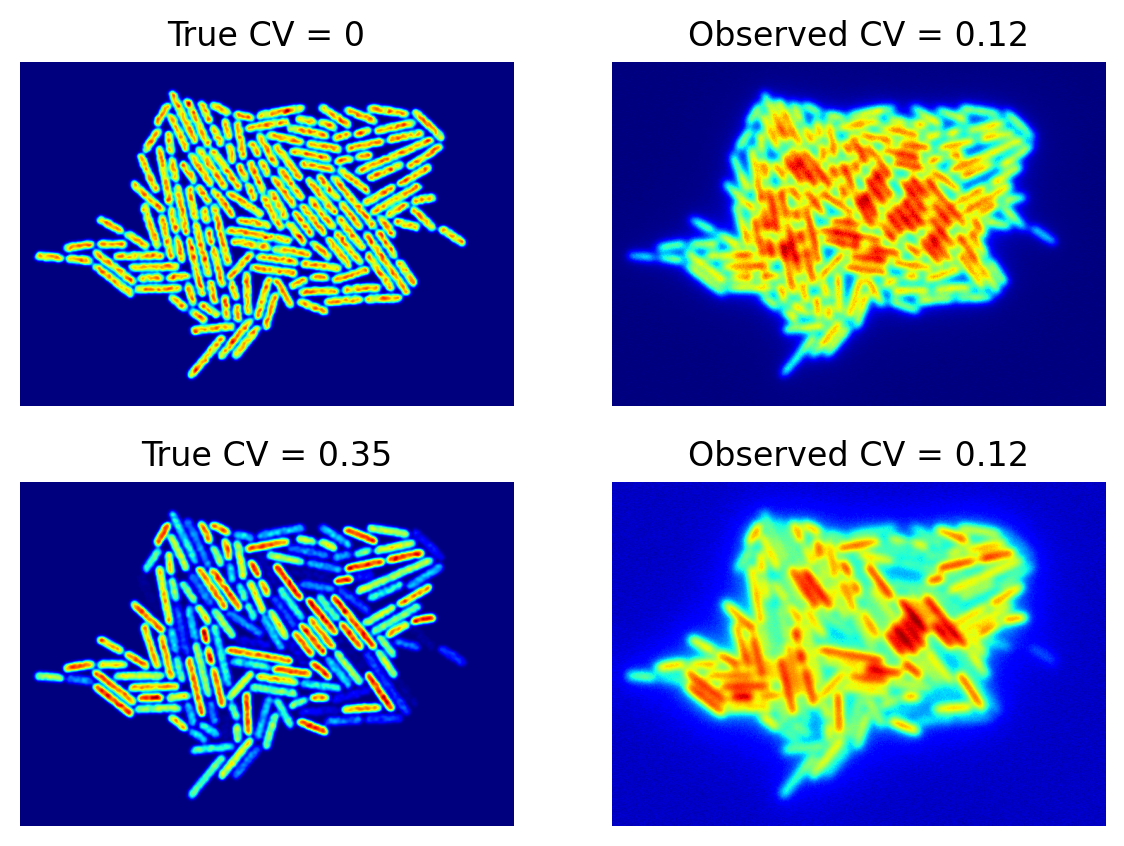

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(7,5), dpi = 200)
axs[0,0].imshow(low_CV_unconv, cmap="jet",norm=PowerNorm(1))
axs[0,0].set_title("True CV = 0")
axs[0,1].imshow(low_CV_conv, cmap="jet",norm=PowerNorm(2))
axs[0,1].set_title("Observed CV = 0.12")
axs[1,0].imshow(high_CV_unconv, cmap="jet", norm=PowerNorm(1))
axs[1,0].set_title("True CV = 0.35")
axs[1,1].imshow(high_CV_conv, cmap="jet", norm=PowerNorm(1))
axs[1,1].set_title("Observed CV = 0.12")
for ax in axs.flatten():
    ax.axis("off")
    

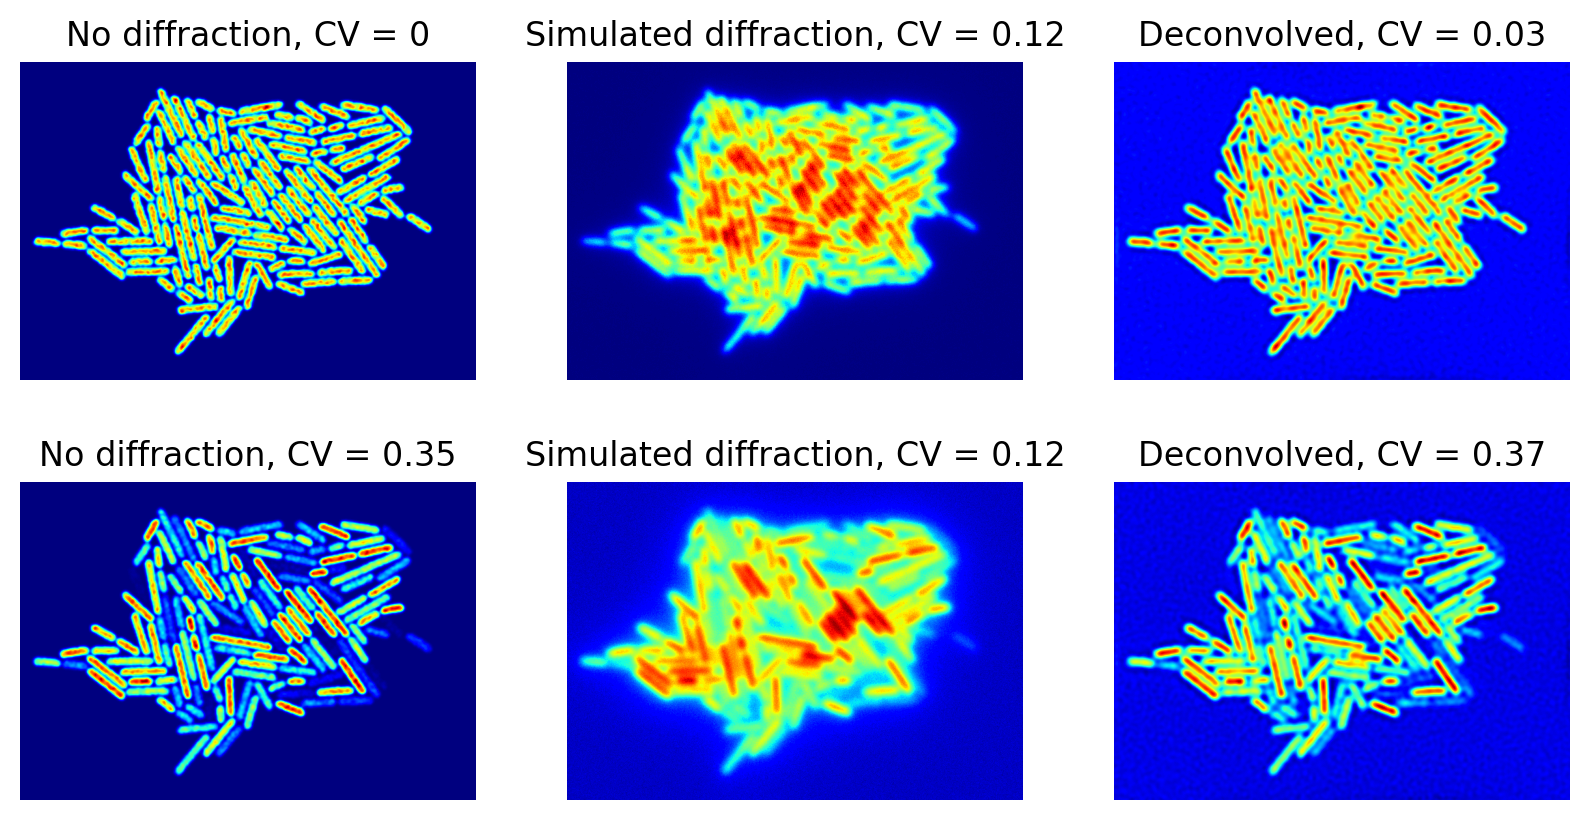

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(10,5), dpi = 200)
deconvolved_img = restoration.wiener(low_CV_conv/10000000, psf, 100)
axs[0,0].imshow(low_CV_unconv, cmap="jet",norm=PowerNorm(1))
axs[0,0].set_title("No diffraction, CV = 0")
axs[0,1].imshow(low_CV_conv, cmap="jet",norm=PowerNorm(2))
axs[0,1].set_title("Simulated diffraction, CV = 0.12")
axs[0,2].imshow(deconvolved_img, cmap="jet")
axs[0,2].set_title("Deconvolved, CV = 0.03")
axs[1,0].imshow(high_CV_unconv, cmap="jet", norm=PowerNorm(1))
axs[1,0].set_title("No diffraction, CV = 0.35")
axs[1,1].imshow(high_CV_conv, cmap="jet", norm=PowerNorm(1))
axs[1,1].set_title("Simulated diffraction, CV = 0.12")
deconvolved_img = restoration.wiener(high_CV_conv/1000000, psf, 100)
axs[1,2].imshow(deconvolved_img, cmap="jet")
axs[1,2].set_title("Deconvolved, CV = 0.37")
for ax in axs.flatten():
    ax.axis("off")
    

In [15]:
deconvolved_img.shape

(488, 700)

In [16]:
master_mask.shape

(488, 700)

In [8]:
get_CV_from_img_mask(deconvolved_img, master_mask)

NameError: name 'get_CV_from_img_mask' is not defined

In [20]:
from skimage.util import random_noise

In [29]:
psf.shape

(300, 300)

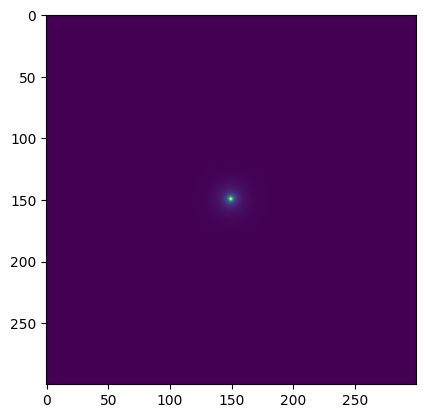

In [81]:
#psf = random_noise(psf, mode='gaussian')
unconvolved_dir = natsorted(glob("data/scenes/*.png"))
convolved_dir = natsorted(glob("training_data/training_data_100x_0.65_far red_1.45_1.518/synth_imgs/*"))
my_kernel = PSF_generator(
    radius = 150, 
    wavelength = 0.54, 
    NA=1.45, 
    n = 1.518, 
    resize_amount=1, 
    pix_mic_conv=0.065, 
    apo_sigma = 10, 
    mode="3d fluo", 
    condenser="Ph3", 
    z_height = 50
)
my_kernel.calculate_PSF()
psf = my_kernel.kernel.mean(axis=0)
#psf = random_noise(psf, "gaussian", var = 0.00001)
plt.imshow(psf)


True CV 0.0237650234657046
Observed CV 0.121735535823828
Deconvolved CV 0.03049685699788966


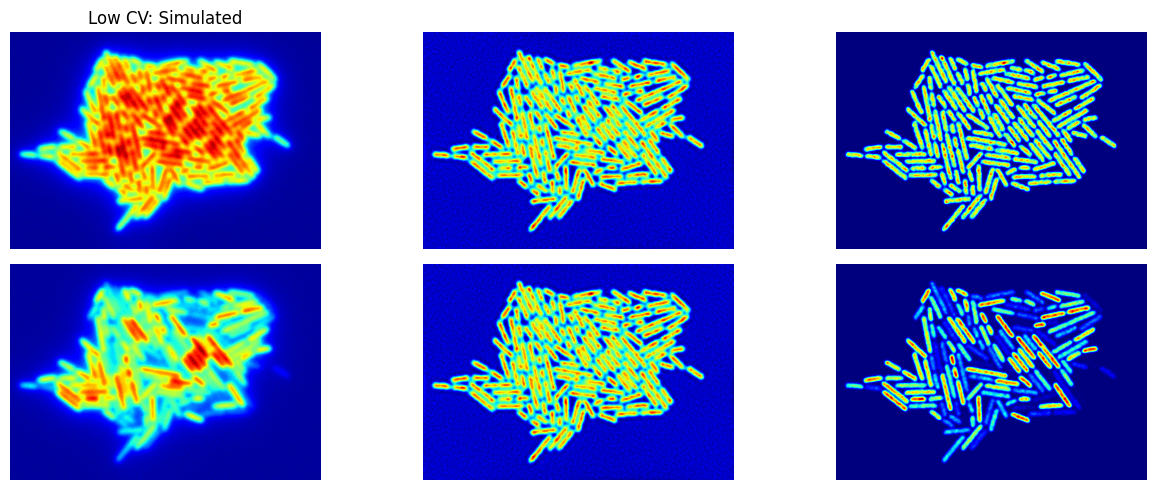

In [82]:
deconvolved_img = restoration.wiener(low_CV_conv/1000000, psf, 10)
print("True CV", get_CV_from_img_mask(low_CV_unconv, master_mask)[0])
print("Observed CV", get_CV_from_img_mask(low_CV_conv, master_mask)[0])
print("Deconvolved CV", get_CV_from_img_mask(deconvolved_img, master_mask)[0])
fig, axs = plt.subplots(2, 3, figsize=(13,5))
axs[0,0].imshow(low_CV_conv,norm=PowerNorm(1.3), cmap="jet")
axs[0,0].set_title("Low CV: Simulated")
axs[0,1].imshow(deconvolved_img, norm=PowerNorm(1.3), cmap="jet")
axs[0,2].imshow(low_CV_unconv,norm=PowerNorm(1.3), cmap="jet")
axs[1,0].imshow(high_CV_conv,norm=PowerNorm(1.3), cmap="jet")
axs[1,1].imshow(deconvolved_img, norm=PowerNorm(1.3), cmap="jet")
axs[1,2].imshow(high_CV_unconv,norm=PowerNorm(1.3), cmap="jet")
for ax in axs.flatten():
    ax.axis("off")
plt.tight_layout()
plt.show()

True CV 0.4774091627726504
Observed CV 0.2636014502322282
Deconvolved CV 0.4438792845892517


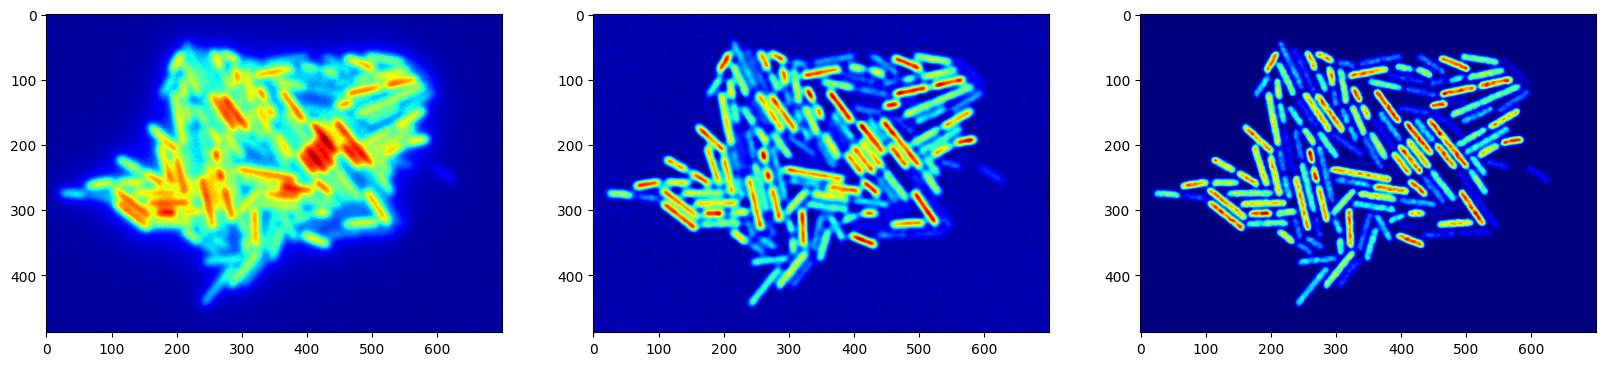

In [83]:
deconvolved_img = restoration.wiener(high_CV_conv/1000000, psf, 100)
print("True CV", get_CV_from_img_mask(high_CV_unconv, master_mask)[0])
print("Observed CV", get_CV_from_img_mask(high_CV_conv, master_mask)[0])
print("Deconvolved CV", get_CV_from_img_mask(deconvolved_img, master_mask)[0])
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].imshow(high_CV_conv,norm=PowerNorm(1.3), cmap="jet")
axs[1].imshow(deconvolved_img, norm=PowerNorm(1.3), cmap="jet")
axs[2].imshow(high_CV_unconv,norm=PowerNorm(1.3), cmap="jet")
plt.show()